## Evaluation of Ridge-regression models of cortical-cerebellar connectivity

In [1]:
import seaborn as sb
import pandas as pd
import numpy as np
import connectivity.constants as const

The relevant files for the training and evaluation of the ridge models can be generated using  `scripts/script_ridge.py` and calling 

In [ ]:
run_ridge(162,[-2,0,2,4,6,8,10])
run_ridge(362,[-2,0,2,4,6,8,10])
run_ridge(642,[-2,0,2,4,6,8,10])
eval_ridge(162,[-2,0,2,4,6,8,10])
eval_ridge(362,[-2,0,2,4,6,8,10])
eval_ridge(642,[-2,0,2,4,6,8,10])

In [5]:
# Load the evalution on all Ridge models and concatinate 
d= const.Dirs()
T1 = pd.read_csv(d.conn_eval_dir / 'Ridge_WB162.dat')
T2 = pd.read_csv(d.conn_eval_dir / 'Ridge_WB362.dat')
T3 = pd.read_csv(d.conn_eval_dir / 'Ridge_WB642.dat')
T = pd.concat([T1,T2,T3])
T1.columns

Index(['Unnamed: 0', 'SN', 'name', 'glm', 'train_exp', 'eval_exp', 'averaging',
       'weighting', 'incl_inst', 'X_data', 'Y_data', 'mode', 'eval_splitby',
       'logalpha', 'R', 'R2', 'noise_Y_R', 'noise_Y_R2', 'noise_X_R',
       'noise_X_R2'],
      dtype='object')

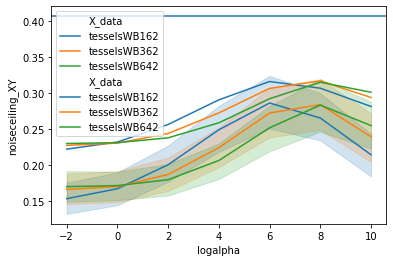

In [18]:
# Make a line plot of the cross-validated R 
T['noiseceiling_Y']=np.sqrt(T.noise_Y_R)
T['noiseceiling_XY']=np.sqrt(T.noise_Y_R)*np.sqrt(T.noise_X_R)

sb.lineplot(x='logalpha',y='R',data=T, hue='X_data')
ax= sb.lineplot(x='logalpha',y='noiseceiling_XY',data=T, hue='X_data', ci=None)

# Model independent noise ceiling
ax.axhline(np.mean(T.noiseceiling_Y))

So for L2 it seems quite independent of the number of tessels - only that more tessels need more regularization. 